In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import *

In [127]:
os.chdir(r'E:\Sem6\PRML\Programaming_Assignment\29_ ME17B176_ ME17B175')
df = pd.read_csv('Dataset-3-Team-29.csv')
df = df.rename(columns={'# x_1':'x'})

In [102]:
def sample_std(data,n):
    d = data.sample(n,random_state=42)
    dif = d-np.mean(data,0)
    s = dif @ dif
    s = sqrt(s)/(n-1)  #Used n-1 as it is true std and we are supposed to know that.
    return s

In [125]:
#Ques_1
sig = sample_std(df.x,df.size)                #Value of sample standard deviation
print(sig)

0.05237484644337737


In [76]:
#Que2

#Given Data
mu_o = -1
n = np.array( [10, 100, 1000] )
ratio = np.array([0.1, 1, 10, 100])

In [97]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

#Function which returns mu_n
def mu_n(data,n,mu_o,ratio):
    x_n = data.sample(n=10,random_state=42)
    return (sum(x_n.x)+(ratio*mu_o))/(n+ratio)

#Function which returns sigma^2_n
def var_n(data,n,mu_o,ratio):
    x_n = data.sample(n=10,random_state=42)
    return ratio/(n+ratio)

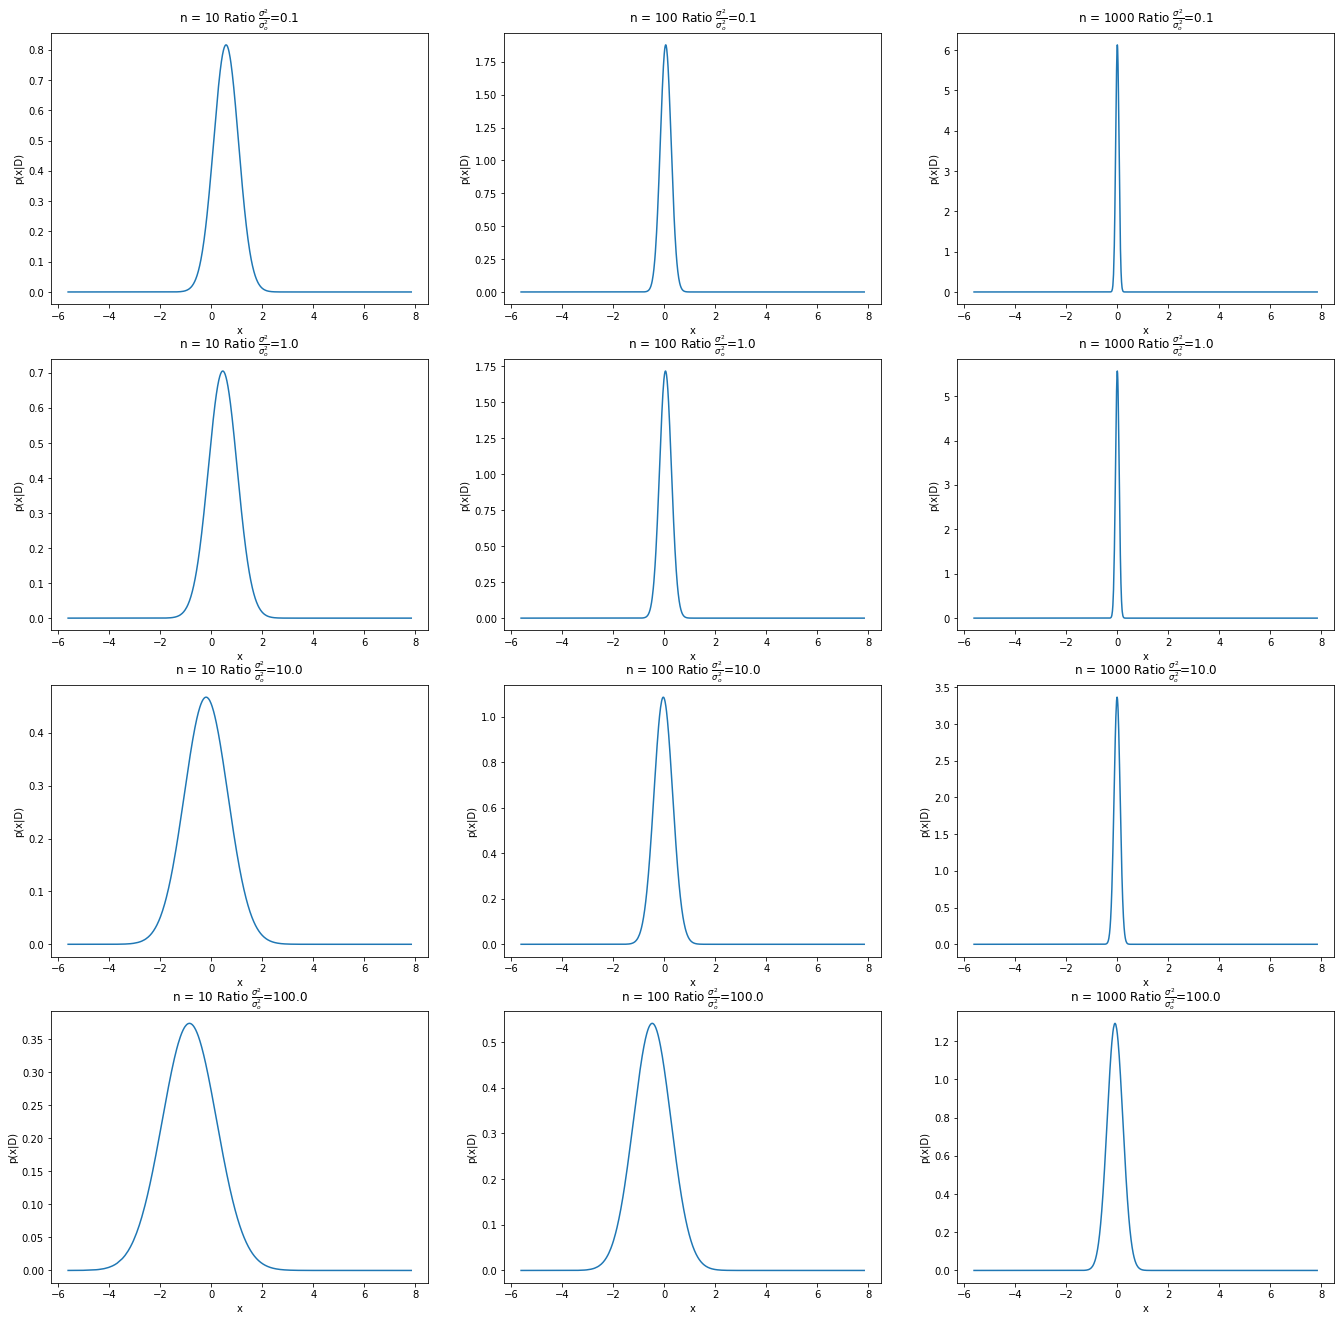

In [128]:
fig,axes = plt.subplots(4,3,figsize=(23,23))
u_o = -1
for i in range(n.size):
    for j in range(ratio.size):
        x = np.array(df.x)
        x = np.sort(x)
        u_n = mu_n(df,n[i],u_o,ratio[j])
        sig_est = sqrt( var_n(df,n[i],u_o,ratio[j]) + (sample_std(df.x,n[i])**2) )
        y = gaussian(x,u_n,sig_est)
        axes[j][i].plot(x,y)
        axes[j][i].set(xlabel ='x',ylabel = 'p(x|D)',title = 
                       ('n = '+str(n[i])+' Ratio '+r'$\frac{\sigma^2}{\sigma_o^2}$'+ '=' +str(ratio[j])))